In [1]:
# ✅ Step 1: 載入必要套件
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import numpy as np
import platform

In [ ]:
import certifi
import os
os.environ['SSL_CERT_FILE'] = certifi.where()
#


In [5]:
# ✅ Step 2: 自動設定跨平台中文字體
if platform.system() == 'Darwin':
    plt.rcParams['font.family'] = ['Arial Unicode MS']
elif platform.system() == 'Windows':
    plt.rcParams['font.family'] = ['Microsoft JhengHei']
else:
    plt.rcParams['font.family'] = ['Noto Sans CJK TC']

plt.rcParams['axes.unicode_minus'] = False


In [6]:
# ✅ Step 3: 設定分析標的
base_stock_symbol = "2330.TW"      # 台積電
base_stock_name = "台積電"

compare_stock_symbol = "0056.TW"   # 這裡只要修改成你想分析的 ETF 代碼
compare_stock_name = "0056高股息ETF"

start_date = "2022-01-01"
end_date = "2024-12-31"

In [8]:
# ✅ Step 4: 下載歷史資料
base_data = yf.download(base_stock_symbol, start=start_date, end=end_date)
compare_data = yf.download(compare_stock_symbol, start=start_date, end=end_date)

Failed to get ticker '2330.TW' reason: Failed to perform, curl: (60) SSL certificate problem: unable to get local issuer certificate. See https://curl.se/libcurl/c/libcurl-errors.html first for more details.
[*********************100%***********************]  1 of 1 completed

1 Failed download:
['2330.TW']: YFTzMissingError('possibly delisted; no timezone found')
Failed to get ticker '0056.TW' reason: Failed to perform, curl: (60) SSL certificate problem: unable to get local issuer certificate. See https://curl.se/libcurl/c/libcurl-errors.html first for more details.
[*********************100%***********************]  1 of 1 completed

1 Failed download:
['0056.TW']: YFTzMissingError('possibly delisted; no timezone found')


In [9]:
# ✅ Step 5: 計算每日報酬率 (用證券代碼作為欄位名稱 → 避免中文欄位名稱出錯)
base_data['Return'] = base_data['Close'].pct_change()
compare_data['Return'] = compare_data['Close'].pct_change()

returns = pd.DataFrame({
    f'{base_stock_symbol}_Return': base_data['Return'],
    f'{compare_stock_symbol}_Return': compare_data['Return']
}).dropna()

In [10]:
# ✅ Step 6: 建立線性回歸模型
X = returns[f'{base_stock_symbol}_Return'].values.reshape(-1, 1)
y = returns[f'{compare_stock_symbol}_Return'].values

model = LinearRegression()
model.fit(X, y)

slope = model.coef_[0]
intercept = model.intercept_

ValueError: Found array with 0 sample(s) (shape=(0, 1)) while a minimum of 1 is required by LinearRegression.

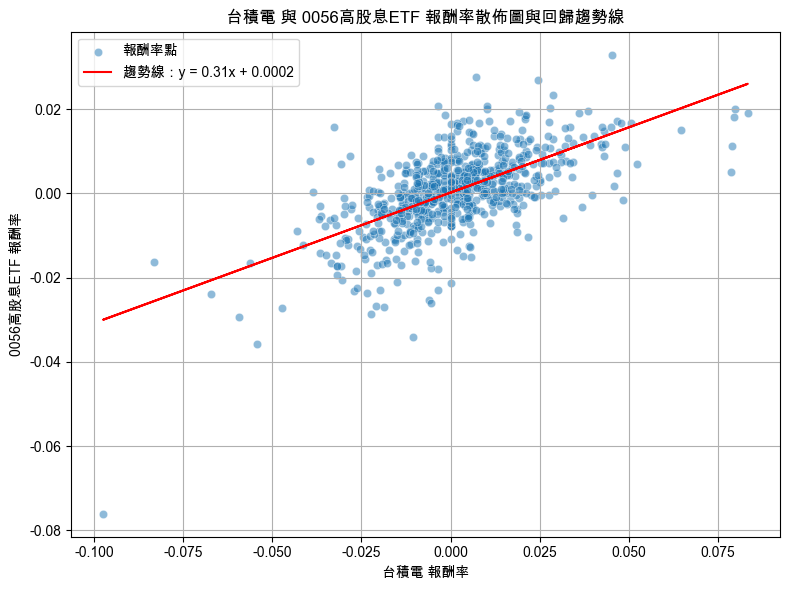

In [21]:
# ✅ Step 7: 畫出報酬率散佈圖與回歸線
plt.figure(figsize=(8, 6))
sns.scatterplot(x=returns[f'{base_stock_symbol}_Return'], y=returns[f'{compare_stock_symbol}_Return'], alpha=0.5, label='報酬率點')
plt.plot(returns[f'{base_stock_symbol}_Return'], model.predict(X), color='red',
         label=f'趨勢線：y = {slope:.2f}x + {intercept:.4f}')
plt.title(f'{base_stock_name} 與 {compare_stock_name} 報酬率散佈圖與回歸趨勢線')
plt.xlabel(f'{base_stock_name} 報酬率')
plt.ylabel(f'{compare_stock_name} 報酬率')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [22]:
# ✅ Step 8: 顯示回歸模型參數與簡單結論
print("="*40)
print(f"回歸模型公式： {compare_stock_name}報酬率 = {slope:.4f} * {base_stock_name}報酬率 + {intercept:.4f}")
print(f"當 {base_stock_name} 上漲 1%，預期 {compare_stock_name} 上漲約 {slope*100:.2f}%")
print("="*40)

回歸模型公式： 0056高股息ETF報酬率 = 0.3095 * 台積電報酬率 + 0.0002
當 台積電 上漲 1%，預期 0056高股息ETF 上漲約 30.95%
